<a href="https://colab.research.google.com/github/jcml002/Reto7/blob/main/4_Formato_Reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: JUAN CARLOS MEDINA

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [3]:

#3 Crear dataframes para cada archivo
happiness = pd.read_csv ("/content/sample_data/Happiness_report.csv")
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [4]:
mexico = happiness.loc[happiness["Country or region"]=="Mexico"]
mexico = mexico.set_index("Country or region")
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

/tmp/ipython-input-92-179450182.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mexScore = float(mexico["Score"] / 10)


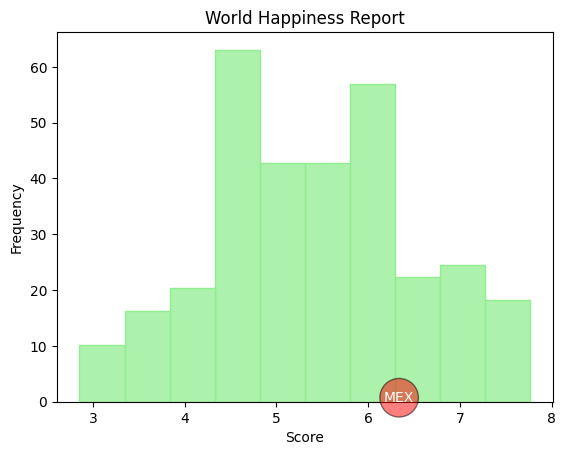

In [ ]:
sns.histplot(data=happiness, stat="frequency" , x="Score",
            bins=10,
            color='lightgreen', edgecolor='lightgreen')
plt.title("World Happiness Report")
mexScore = float(mexico["Score"] / 10)

plt.text(x=mexScore, y=0, s="MEX", fontsize=10, color='white',
         bbox=dict(facecolor='red', alpha=0.5, boxstyle='Circle', pad=0.3),
         transform=plt.gca().transAxes)


plt.show()

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

In [27]:
df = happiness['Healthy life expectancy'].astype(float)

mexHLE = float(mexico["Healthy life expectancy"] )
mexHLE

/tmp/ipython-input-27-631094009.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mexHLE = float(mexico["Healthy life expectancy"] )


0.861

/tmp/ipython-input-33-3170379745.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mexHLE = float(mexico["Healthy life expectancy"] )


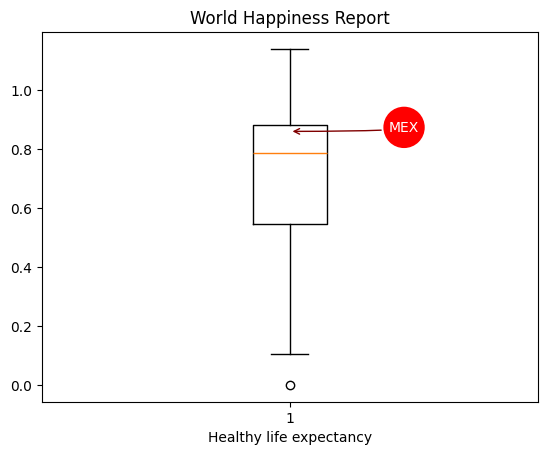

In [33]:
df = happiness['Healthy life expectancy'].astype(float)
#df
plt.boxplot(df)
plt.xlabel("Healthy life expectancy")
plt.title("World Happiness Report")

#sns.boxplot(x=df.index ,y='Healthy life expectancy' ,data=pd.melt(df))

mexHLE = float(mexico["Healthy life expectancy"] )

plt.annotate('MEX',xy=(1,mexHLE),xytext=(1.2,mexHLE) , color='white',fontsize=10,
             bbox=dict(boxstyle="circle,pad=0.3",fc="red", ec="red", lw=2),
             arrowprops=dict(arrowstyle='->', connectionstyle='angle3',color='maroon'))

plt.show()

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

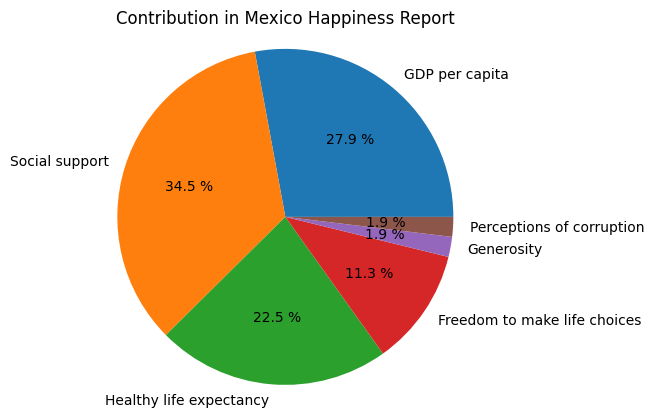

In [ ]:


mexicoT=mexico.transpose()

mexicoT = mexicoT.drop(['Overall rank', 'Score'])

mexicoT.rename(columns = {"Mexico":"Factors"}, inplace = True,errors='ignore')

plt.title("Contribution in Mexico Happiness Report")
plt.pie(x = mexicoT.Factors, labels = mexicoT.index , autopct="%0.1f %%",)

plt.axis("equal")
plt.show()




7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.